In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cybersecurity_attacks.csv')

In [20]:
df.info() # Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [21]:
df.shape  # Dataset Shape

(40000, 25)

In [22]:
df.describe()   # Statistics


,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [23]:
df.isnull().sum()  # Missing Values

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [24]:
df.dropna(inplace=True)  # Handling Missing Values

In [25]:
df.duplicated().sum()

0

In [26]:
df['Payload Data'].dtype

dtype('O')

In [27]:
# Convert your_data to a string

text = str(df['Payload Data'])

In [28]:
from wordcloud import WordCloud

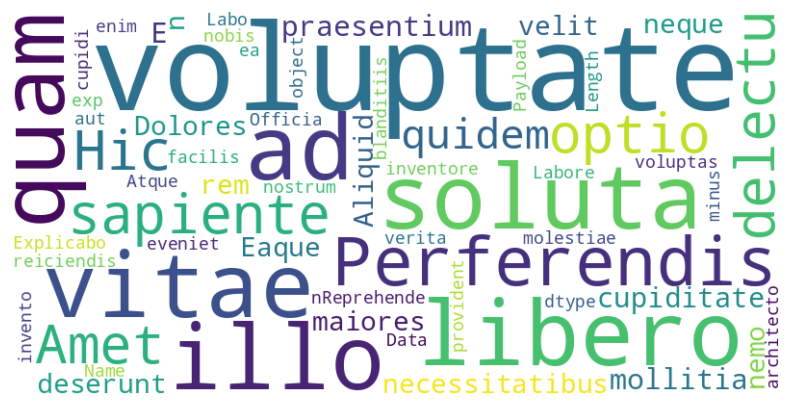

In [29]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

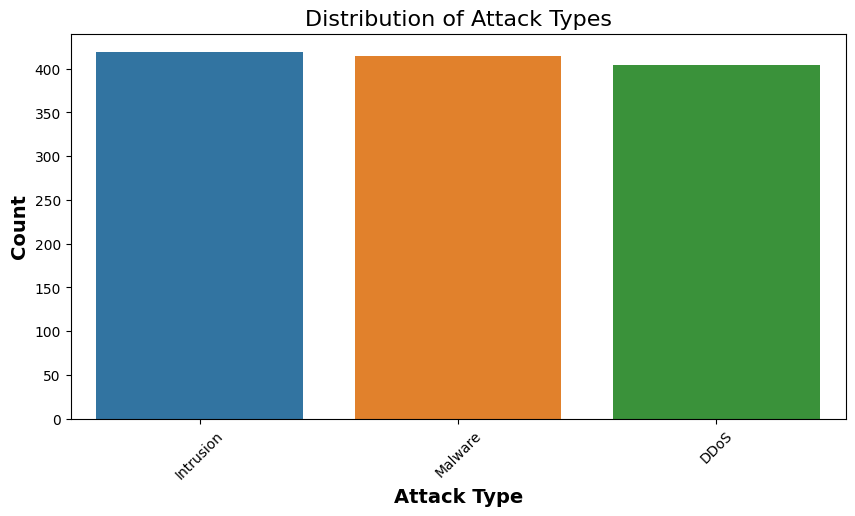

Intrusion    419
Malware      414
DDoS         404
Name: Attack Type, dtype: int64


In [30]:
# Visualize the distribution of attack types

attack_counts = df['Attack Type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=attack_counts.index , y=attack_counts)

plt.xlabel('Attack Type',fontsize=14, fontweight='bold')
plt.ylabel('Count',fontsize=14, fontweight='bold')
plt.title('Distribution of Attack Types', fontsize=16)

plt.xticks(rotation=45)
plt.show()

print(attack_counts)

In [31]:
df['Protocol'].value_counts()

UDP     422
ICMP    421
TCP     394
Name: Protocol, dtype: int64

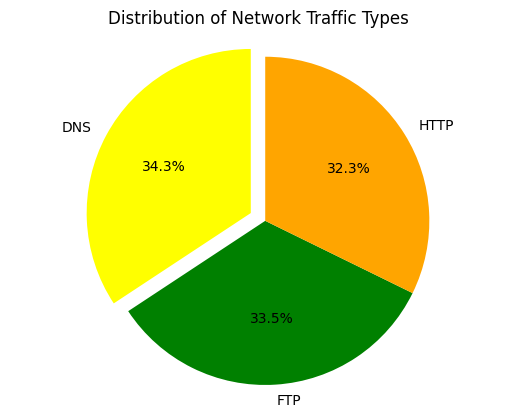

In [32]:
# Data for the pie chart

labels =['DNS','FTP','HTTP']
sizes = df['Traffic Type'].value_counts()
colors = ['yellow', 'green', 'orange']
explode = (0.1, 0, 0)

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Distribution of Network Traffic Types')

# Display the pie chart
plt.show()

In [42]:
df['Action Taken'].value_counts()

Blocked    420
Ignored    413
Logged     404
Name: Action Taken, dtype: int64

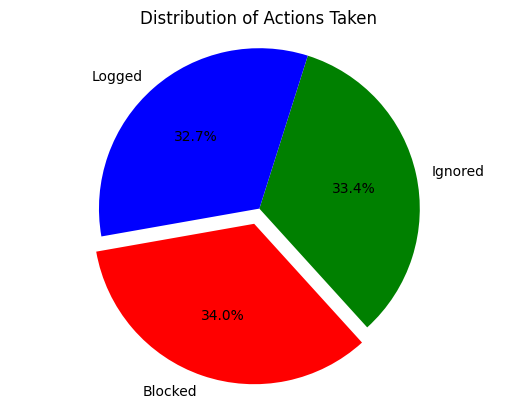

In [33]:
labels =['Blocked','Ignored','Logged']
sizes =df['Action Taken'].value_counts()
colors = ['Red', 'green', 'blue']
explode = (0.1, 0, 0)


# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=190)

plt.axis('equal')
plt.title('Distribution of Actions Taken')

# Display the pie chart
plt.show()

In [34]:
df['Packet Type'].value_counts()

Data       619
Control    618
Name: Packet Type, dtype: int64

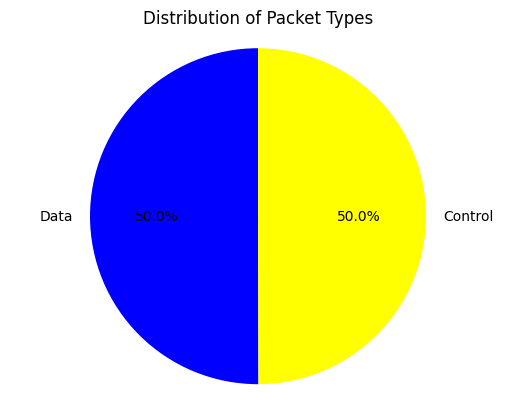

In [35]:
# Data for the pie chart
labels =['Data','Control']
sizes = df['Packet Type'].value_counts()
colors = ['blue', 'yellow']
explode = (0, 0)

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)


plt.axis('equal')
plt.title('Distribution of Packet Types')

# Display the pie chart
plt.show()

In [36]:
df['Severity Level'].value_counts()

High      438
Medium    406
Low       393
Name: Severity Level, dtype: int64

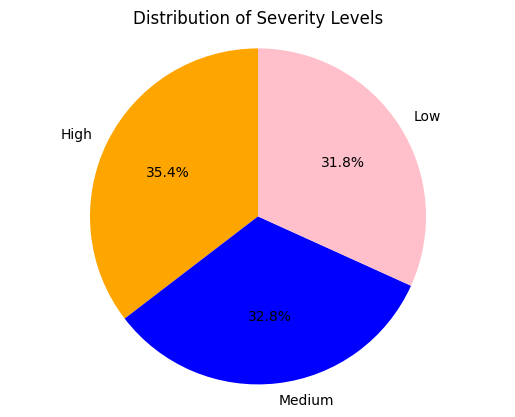

In [37]:
# Data for the pie chart
labels =['High','Medium','Low']
sizes =df['Severity Level'].value_counts()
colors = ['orange', 'blue','pink']
explode = (0, 0,0)

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Distribution of Severity Levels')

# Display the pie chart
plt.show()

In [38]:
df['Log Source'].value_counts()

Server      623
Firewall    614
Name: Log Source, dtype: int64

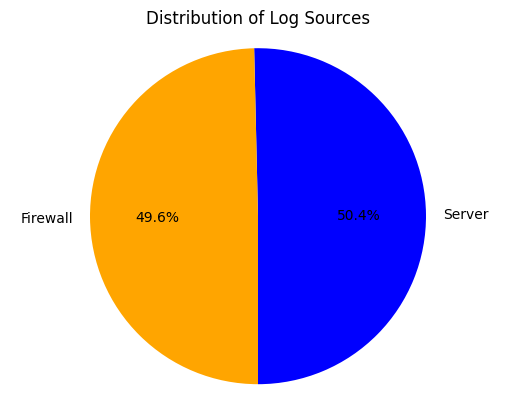

In [39]:
labels =['Server','Firewall']
sizes =df['Log Source'].value_counts()
colors = ['blue', 'orange']
explode = (0, 0)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=270)

plt.axis('equal')
plt.title('Distribution of Log Sources')

# Display the pie chart
plt.show()

In [40]:
df['Traffic Type'].value_counts()

DNS     424
FTP     414
HTTP    399
Name: Traffic Type, dtype: int64

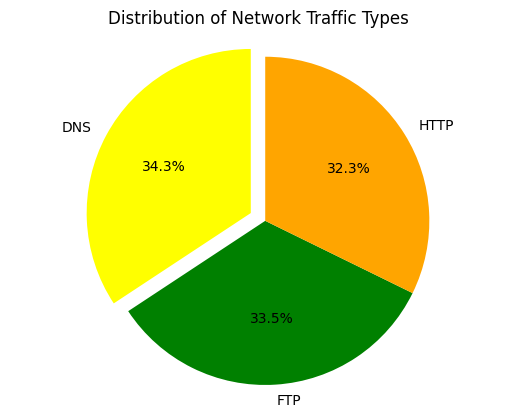

In [41]:
# Data for the pie chart

labels =['DNS','FTP','HTTP']
sizes = df['Traffic Type'].value_counts()
colors = ['yellow', 'green', 'orange']
explode = (0.1, 0, 0)

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Distribution of Network Traffic Types')

# Display the pie chart
plt.show()